# Heart Failure Predictions
From Kaggle: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.




## Goal: create a model for predicting mortality caused by Heart Failure

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn import metrics

from xgboost import XGBRegressor


plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10)

%matplotlib inline

### Load and characterize dataset

In [8]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [9]:
df.shape

(299, 13)

In [10]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [13]:
# How many of each column are missing
# get names of columsn with missing values

cols_with_missing = [col for col in df.columns
                    if df[col].isnull().any()]

print('Columns with missing values: ', cols_with_missing)

for x in cols_with_missing:
    print(x, ':', df[x].isna().sum())

Columns with missing values:  []


<AxesSubplot:>

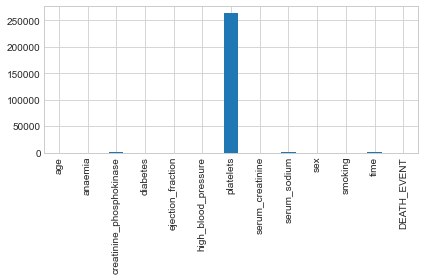

In [14]:
df.mean().plot(kind='bar')

<AxesSubplot:>

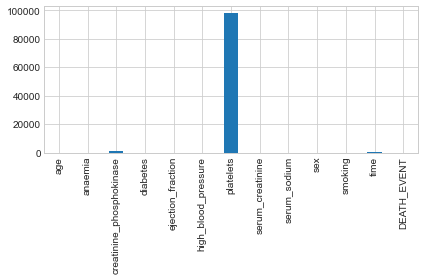

In [15]:
df.std().plot(kind='bar')

In [16]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

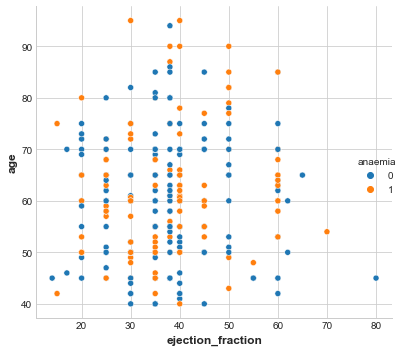

In [17]:
sns.relplot(x = 'ejection_fraction', y = 'age', hue = 'anaemia', data = df)

# Explore some K means clusters

In [33]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [36]:
features = ['anaemia', 'diabetes', 'ejection_fraction']

# standardize
df_scaled = df.loc[:, features]
df_scaled = (df_scaled - df_scaled.mean(axis=0)) / df_scaled.std(axis=0)

kmeans = KMeans(n_clusters = 3,n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(df_scaled)

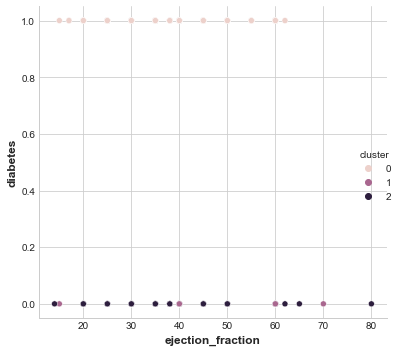

In [38]:
sns.relplot(x = 'ejection_fraction', y = 'diabetes', hue = 'cluster', data = df)

## Mutual Information scores

In [15]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [13]:
#y = df.DEATH_EVENT

df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [17]:
#X = df.drop(columns=['DEATH_EVENT','cluster'],axis=1)
y = pd.to_numeric(df['DEATH_EVENT'])
X = df.copy()
X.drop('DEATH_EVENT',axis=1,inplace=True)


discrete_features = ['anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure',
       'serum_sodium', 'sex', 'smoking', 'time']

mi_scores = make_mi_scores(X, y, 'auto')

In [18]:
print(mi_scores)

time                        0.248327
ejection_fraction           0.088721
serum_creatinine            0.088159
serum_sodium                0.055059
age                         0.039645
anaemia                     0.016775
sex                         0.014978
creatinine_phosphokinase    0.013152
diabetes                    0.011616
high_blood_pressure         0.001469
platelets                   0.000000
smoking                     0.000000
Name: MI Scores, dtype: float64


Most of these MI scores are very low. The smoking one is curious as we might expect smoking to have an impact on heart failure. For now, we will remove high blood pressure, platelets, and smoking for our models

# Try a randomized search CV to isolate model parameters

In [19]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [20]:
# Create the random grid
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}

In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

# we will use the whole dataset for now to help isolate the parameters
y_train = df.DEATH_EVENT
X_train = df.copy()
X_train.drop('DEATH_EVENT',axis=1,inplace=True)




# define the pipeline
my_pipeline = Pipeline(steps=[('rf', RandomForestRegressor())])

grid_pipeline = RandomizedSearchCV(my_pipeline, param_distributions = random_grid, 
                                   n_iter = 200, cv = 3, verbose=2,
                                   random_state=2, n_jobs = -1)


#print(grid_pipeline.get_params().keys())

grid_pipeline.fit(X_train, y_train)

print(grid_pipeline.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'rf__n_estimators': 100, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 4, 'rf__max_features': 'auto', 'rf__max_depth': 70, 'rf__bootstrap': True}


In [30]:
grid_search_results = pd.DataFrame.from_dict(grid_pipeline.cv_results_)
grid_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__n_estimators,param_rf__min_samples_split,param_rf__min_samples_leaf,param_rf__max_features,param_rf__max_depth,param_rf__bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.363777,0.020674,0.027408,0.004323,400,2,4,sqrt,20,False,"{'rf__n_estimators': 400, 'rf__min_samples_spl...",-0.531291,0.181326,-0.650101,-0.333356,0.367153,120
1,0.129819,0.017182,0.009663,0.002388,100,2,4,sqrt,None,True,"{'rf__n_estimators': 100, 'rf__min_samples_spl...",-0.550434,0.202474,-0.653396,-0.333785,0.381515,122
2,1.059664,0.021558,0.058181,0.004659,900,10,4,sqrt,30,True,"{'rf__n_estimators': 900, 'rf__min_samples_spl...",-0.538289,0.189673,-0.661572,-0.336729,0.375610,132
3,0.561679,0.014154,0.042580,0.004682,600,10,1,sqrt,20,False,"{'rf__n_estimators': 600, 'rf__min_samples_spl...",-0.477687,0.170184,-0.637540,-0.315014,0.349238,68
4,0.726886,0.036258,0.041849,0.008478,600,2,1,sqrt,10,True,"{'rf__n_estimators': 600, 'rf__min_samples_spl...",-0.474095,0.164193,-0.599175,-0.303026,0.334296,58


<AxesSubplot:xlabel='param_rf__n_estimators', ylabel='param_rf__max_depth'>

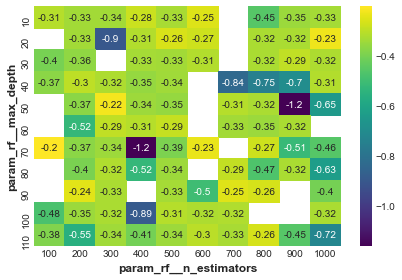

In [31]:
heatmap_data = pd.pivot_table(grid_search_results, values='mean_test_score',
                             index=['param_rf__max_depth'],
                             columns='param_rf__n_estimators')

sns.heatmap(heatmap_data, annot = True, cmap='viridis')

# Use XGBoost

In [18]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [42]:
# Select subset of predictors
cols_to_use = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
               'ejection_fraction',# 'high_blood_pressure', 'platelets',
              'serum_creatinine', 'serum_sodium', 'sex',# 'smoking', 
               'time']

#cols_to_use = ['serum_creatinine', 'ejection_fraction']

X = df[cols_to_use]

# Select target
y = df.DEATH_EVENT

# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.20, random_state = 1)

In [43]:
my_model = XGBRegressor(n_estimators = 500, learning_rate = 0.05, n_jobs = 2)
my_model.fit(X_train, y_train,
             early_stopping_rounds = 5,
             eval_set = [(X_valid, y_valid)],
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
my_model.score(X_valid, y_valid)

0.43277188356964613